In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
# Importing a dataset
data =  pd.read_csv('data/for_model.csv', index_col = [0])
y = pd.read_csv("data/for_model_y.csv", index_col = [0])

In [4]:
data.head()

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
0,Chrzanów,37123,Numerical and material recording clerks,"Stretching,Cooking,Parkour",268,1.0,Visa,In relationship,3.0,34.0,32.0
1,Konstancin-Jeziorna,17191,Production and specialised services managers,"Squash,Cardio,Astronomy",204,0.0,Mastercard,In relationship,3.0,36.0,5.0
2,Stalowa Wola,61903,Personal care workers,"Cardio,Power bike,Wood carving,Acting,Rappelling",128,1.0,Visa,In relationship,3.0,23.0,18.0
3,Braniewo,17074,"Armed forces occupations, other ranks","Bodybuilding,Fitness,Skimboarding",156,1.0,Visa,Married with kids,5.0,56.0,76.0
4,Sieniawa,2146,General and keyboard clerks,"Cardio,Rowing,Gym,Dowsing",182,0.0,Visa,In relationship,5.0,37.0,45.0


We can see that the data is less because we are only working on training data

In [5]:
NA = pd.DataFrame(data=[data.notna().sum().tolist(),
            data.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (data.isna().sum()/data.shape[0]*100).tolist()]], 
           columns=data.columns, index=['Not NA Count', 'NA Count', 'NA Percent']).transpose()
NA

,Not NA Count,NA Count,NA Percent
location,2800,0,0.00%
location_population,2800,0,0.00%
occupation,2800,0,0.00%
hobbies,2322,478,17.07%
friends_number,2800,0,0.00%
sex,2800,0,0.00%
credit_card_type,2800,0,0.00%
relationship_status,2800,0,0.00%
education,2800,0,0.00%
dob,2800,0,0.00%


Data that does not have missing values

In [6]:
data_no_na = data.dropna()
data_no_na.count()

location               2322
location_population    2322
occupation             2322
hobbies                2322
friends_number         2322
sex                    2322
credit_card_type       2322
relationship_status    2322
education              2322
dob                    2322
daily_commute          2322
dtype: int64

In [7]:
data_is_na = data[data.isna().any(axis=1)]
data_is_na

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
10,Hajnówka,20919,"Armed forces occupations, other ranks",NaN,254,1.0,American Express,Married with kids,5.0,68.0,64.000000
11,Jastrzębie-Zdrój,89590,"Legal, social and cultural professionals",NaN,341,1.0,Visa,Single,5.0,25.0,38.000000
12,Jastrzębie-Zdrój,89590,"Agricultural, forestry and fishery labourers",NaN,229,1.0,Mastercard,Married,2.0,53.0,37.000000
13,Jaworzno,92090,Commissioned armed forces officers,NaN,244,0.0,Visa,In relationship,5.0,27.0,21.000000
34,Bytom,168394,Other clerical support workers,NaN,267,1.0,Visa,Married,2.0,57.0,88.000000
...,...,...,...,...,...,...,...,...,...,...,...
2760,Warszawa,1764615,"Legal, social, cultural and related associate ...",NaN,188,0.0,Visa,Single,2.0,22.0,5.000000
2776,Włocławek,111752,"Food processing, wood working, garment and oth...",NaN,307,1.0,Mastercard,In relationship,3.0,49.0,50.704293
2782,Tarnów,109650,Non-commissioned armed forces officers,NaN,296,1.0,Visa,Divorced,4.0,78.0,46.838235
2787,Kraków,767348,Market-oriented skilled agricultural workers,NaN,213,1.0,Mastercard,Married,1.0,68.0,50.000000


In [8]:
hobby_columns = data_no_na['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
hobby_columns.head()

,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,Baseball,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 174 different hobbies in the data we have

We examine what hobbies occur most frequently

In [32]:
hobb = hobby_columns.sum().sort_values(ascending=False)
hobb.head(20)

Gym                 183
Squash              183
Bodybuilding        178
Rowing              171
Cardio              161
Weightlifting       158
Badminton           149
Crossfit            147
Fitness             145
Stretching          143
Power bike          143
Kettleballs         135
Parkour              40
Poi                  39
Sculpting            39
Skydiving            36
Drama                36
Book restoration     36
Taxidermy            35
Geocaching           35
dtype: int64

We only choose the hobbies that are most common (greater than 100)

In [10]:
hobb_100 = hobb[hobb > 100]

In [11]:
part_hobbies = hobby_columns[hobb_100.index]
part_hobbies.head()

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0


Divide dataset into training and test data 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_no_na, part_hobbies, test_size = 0.25, random_state=1)

Displaying the training set

In [13]:
y_train.head()

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
1332,0,0,0,0,0,0,0,0,1,0,0,0
1511,0,0,0,0,0,0,0,0,0,0,0,0
272,0,1,0,0,0,0,1,0,0,0,0,0
1617,0,0,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train.columns

Index(['Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting',
       'Badminton', 'Crossfit', 'Fitness', 'Stretching', 'Power bike',
       'Kettleballs'],
      dtype='object')

In [15]:
y_train.sum()

Gym              143
Squash           136
Bodybuilding     129
Rowing           130
Cardio           123
Weightlifting    118
Badminton        111
Crossfit         105
Fitness          111
Stretching       115
Power bike       114
Kettleballs      107
dtype: int64

Jedna funkcja jedna rzecz

In [16]:
def transform_function(df, n):
    hobby_columns = df['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
    hobb = hobby_columns.sum().sort_values(ascending=False) # Sorting from largest to smallest
    hobb_100 = hobb[hobb > 100] # Choosing hobbies that repeat 100 or more times
    part_hobbies = hobby_columns[hobb_100.index] # saving the selected hobbies

    hot_credit_card_type = df['credit_card_type'].str.get_dummies() # Application of one hot encoding
    hot_credit_card_type = hot_credit_card_type.drop(hot_credit_card_type.columns[0], axis=1) # reduction in the number of columns

    hot_relationship_status = df['relationship_status'].str.get_dummies() # Application of one hot encoding
    hot_relationship_status = hot_relationship_status.drop(hot_relationship_status.columns[0], axis=1) # reduction in the number of columns

    # Conditional addition of hobby columns 
    if n == True:
        pass
    else:
        df = pd.concat([df, part_hobbies], axis=1)
        
    # Linking tables with data as one hot encoder
    df = pd.concat([df, hot_relationship_status], axis=1)
    df = pd.concat([df, hot_credit_card_type], axis=1)

    df = df.drop(columns=['location', 'occupation', 'credit_card_type', 'hobbies', 'relationship_status']) # Deleting columns

    return df

In [17]:
X_train.head()

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
1332,Wrocław,638586,"Building and related trades workers, excluding...",Fitness,249,0.0,Mastercard,Married with kids,5.0,28.0,52.352113
1511,Ostrowiec Świętokrzyski,69852,Refuse workers and other elementary workers,"Woodworking,Rappelling,Parkour",116,1.0,Visa,Single,4.0,36.0,6.000000
272,Łódź,690422,Health professionals,"Squash,Badminton,Metal detecting,Stand-up comedy",146,0.0,Mastercard,Single,6.0,27.0,46.000000
1617,Warszawa,1764615,Market-oriented skilled agricultural workers,Puzzles,92,0.0,Mastercard,In relationship,2.0,36.0,94.000000
478,Skaryszew,4375,"Chief executives, senior officials and legisla...","Dowsing,Coffee roasting,Fishing",393,1.0,Mastercard,Married with kids,4.0,40.0,46.000000


In [18]:
X_train_trans = transform_function(X_train, True)

In [31]:
X_train_trans.head()

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
1332,638586,249,0.0,5.0,28.0,52.352113,0,0,1,0,1,0,0
1511,69852,116,1.0,4.0,36.0,6.000000,0,0,0,1,0,0,1
272,690422,146,0.0,6.0,27.0,46.000000,0,0,0,1,1,0,0
1617,1764615,92,0.0,2.0,36.0,94.000000,1,0,0,0,1,0,0
478,4375,393,1.0,4.0,40.0,46.000000,0,0,1,0,1,0,0


Training the model on the training group and then applying the model to the data for the group with barracking data. -> creating a df with the results  
Each column has its own Logistic regression model

Zmienne ilościowe, wartości odstające - sprawdzić skośność 

In [38]:
X_train_trans[['location_population','friends_number', 'dob', 'daily_commute']].skew()

location_population    2.101711
friends_number         0.117917
dob                    0.290052
daily_commute          0.006402
dtype: float64

X_train_trans.describe()

In [41]:
X_train_trans['location_population'].max()

1764615

In [42]:
X_train_trans['location_population'].mean()

319510.90292935097

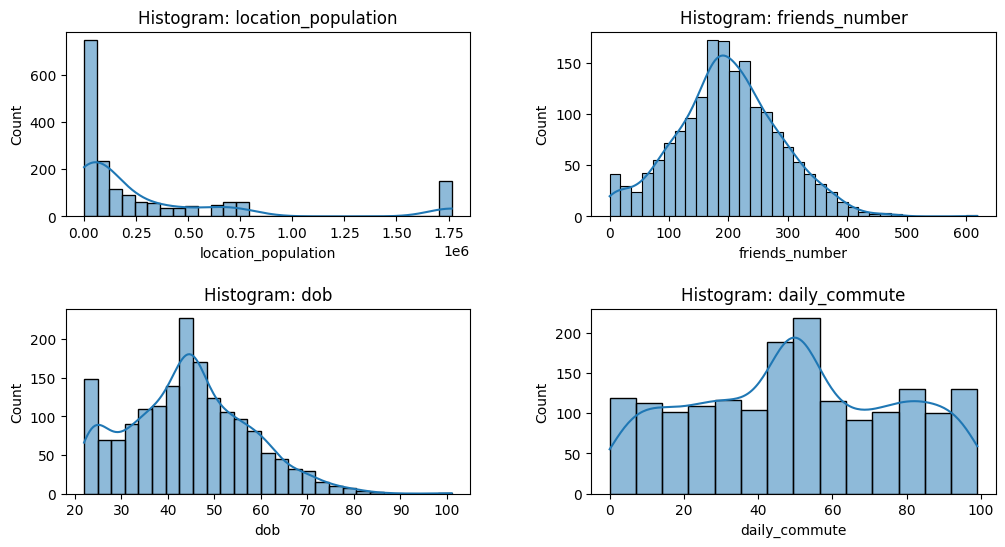

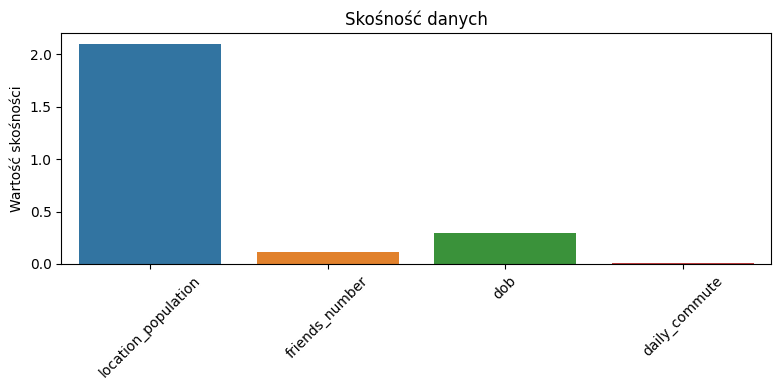

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przykładowe dane - zakładam, że masz już załadowane dane w zmiennej X_train_trans
# X_train_trans = ...

# Wybieram tylko kolumny do analizy
columns_to_analyze = ['location_population', 'friends_number', 'dob', 'daily_commute']
data_to_analyze = X_train_trans[columns_to_analyze]

# Tworzę wykresy
plt.figure(figsize=(12, 6))

# Tworzenie histogramów dla każdej zmiennej
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_to_analyze[column], kde=True)
    plt.title(f'Histogram: {column}')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Tworzenie wykresu skośności (skewness)
skewness_values = data_to_analyze.skew()
plt.figure(figsize=(8, 4))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.title('Data skewness')
plt.xticks(rotation=45)
plt.ylabel('Skewness value')

plt.tight_layout()
plt.show()


In [20]:
X_train_trans.head()

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
1332,638586,249,0.0,5.0,28.0,52.352113,0,0,1,0,1,0,0
1511,69852,116,1.0,4.0,36.0,6.000000,0,0,0,1,0,0,1
272,690422,146,0.0,6.0,27.0,46.000000,0,0,0,1,1,0,0
1617,1764615,92,0.0,2.0,36.0,94.000000,1,0,0,0,1,0,0
478,4375,393,1.0,4.0,40.0,46.000000,0,0,1,0,1,0,0


Training the models  

Each hobby for which we want to get a forecast has its own model 

y_train - zamineić na jedną kolumnę 

In [34]:
y_train.columns

Index(['Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting',
       'Badminton', 'Crossfit', 'Fitness', 'Stretching', 'Power bike',
       'Kettleballs'],
      dtype='object')

dodać RFE

In [21]:
trained_models = {} # Dict with models


for hobby in y_train.columns:
    model = LogisticRegression()
    model.fit(X_train_trans, np.array(y_train[hobby].values))
    trained_models[hobby] = model # save trained models to dict

Application of trained models

In [22]:
pred_hobby_train = pd.DataFrame()

for hobby, model in trained_models.items():
    pred = model.predict(X_train_trans)
    pred_hobby_train[hobby] = pred


Dodać drzewa decyzyjne, XGBoost

Przewidywania tragiczne 

In [23]:
pred_hobby_train.sum()

Gym              0
Squash           0
Bodybuilding     0
Rowing           0
Cardio           0
Weightlifting    0
Badminton        0
Crossfit         0
Fitness          0
Stretching       0
Power bike       0
Kettleballs      0
dtype: int64

Czemu wynik jest tak wysoki??

## Checking the results for the training set

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, pred_hobby_train)
print("Prediction precision:", accuracy)


Prediction precision: 0.43767949454336585


## Checking the results for the test set

In [25]:
X_test_trans = transform_function(X_test, True)

In [26]:
pred_hobby_test = pd.DataFrame()

for hobby, model in trained_models.items():
    pred = model.predict(X_test_trans)
    pred_hobby_test[hobby] = pred

In [27]:
accuracy = accuracy_score(y_test, pred_hobby_test)
print("Prediction precision:", accuracy)

Prediction precision: 0.4457831325301205


Saving models to a file in piccle format

In [28]:
with open('models/all_trained_hobby_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)
